In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [6]:
data = pd.read_csv('Mall_Customers.csv')
print(data.shape)
print(data.head())
print(data.info())
print(data.isnull().sum())

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender        

In [7]:
# Customer ID는 분석에서 쓸모 없으므로 삭제
data = data.drop('CustomerID', axis=1)


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036

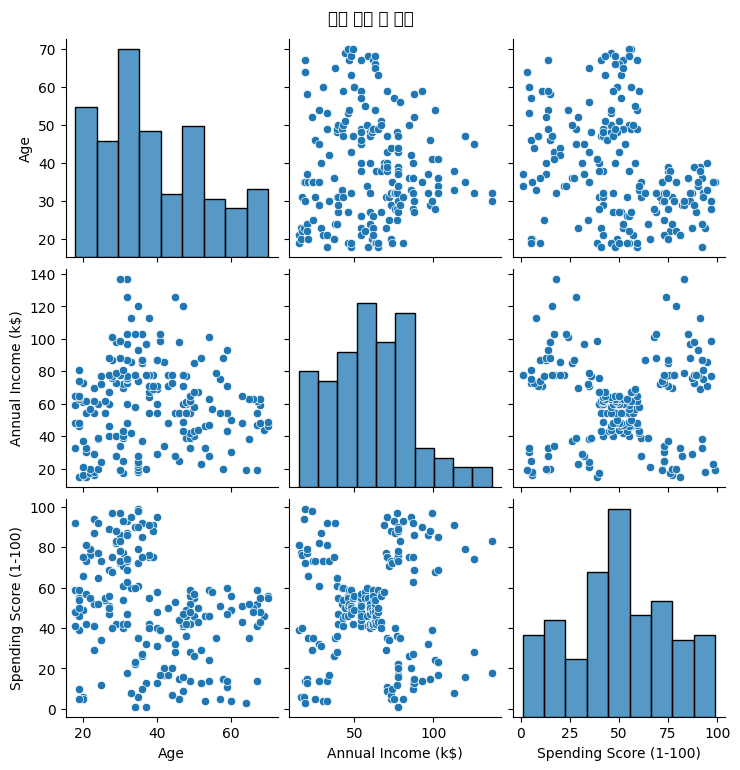

In [11]:
#
sns.pairplot(data)
plt.suptitle('고객 특성 간 관계', y=1.02)
plt.show()

In [15]:
# Annual income, Age는 오른쪽으로 치우쳤으므로 로그 변환
data['Annual Income (k$)'] = np.log1p(data['Annual Income (k$)'])
data['Age'] = np.log1p(data['Age'])

# Spending Score는 정규화
stdscaler = StandardScaler()
data['Spending Score (1-100)'] = stdscaler.fit_transform(data[['Spending Score (1-100)']])

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036

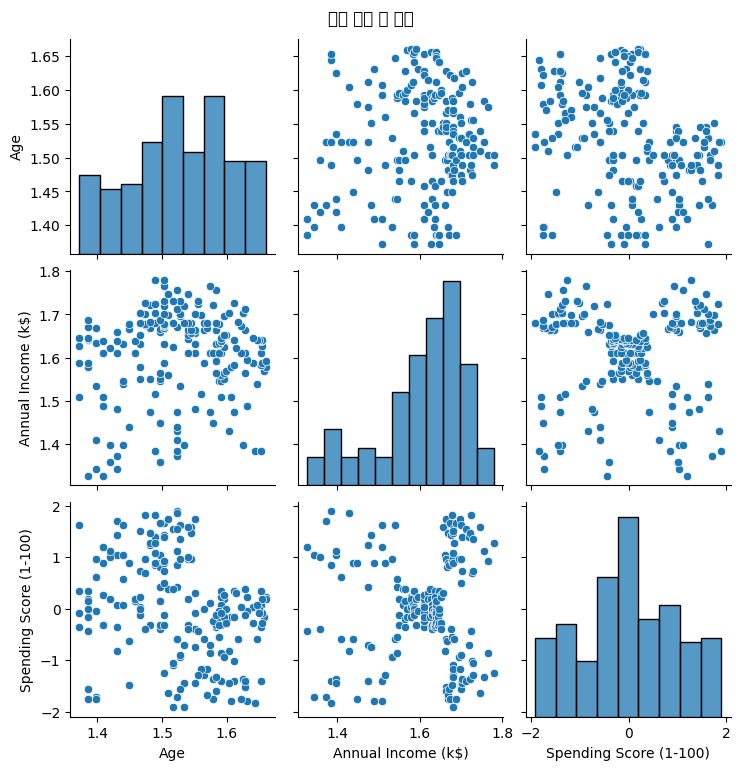

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.pairplot(data)
plt.suptitle('고객 특성 간 관계', y=1.02)
plt.show()

In [22]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot.fit_transform(data[['Gender']])

In [23]:
one_hot_col = one_hot.get_feature_names_out()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_col)

data = pd.concat([data, one_hot_df], axis=1)
print(data.head())

   Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0    Male  1.385227            1.327761               -0.434801   
1    Male  1.408800            1.327761                1.195704   
2  Female  1.397363            1.343703               -1.715913   
3  Female  1.429846            1.343703                1.040418   
4  Female  1.496434            1.358505               -0.395980   

   Gender_Female  Gender_Male  
0            0.0          1.0  
1            0.0          1.0  
2            1.0          0.0  
3            1.0          0.0  
4            1.0          0.0  


In [24]:
data = data.drop('Gender', axis=1)

In [26]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.66501611 0.32432744]


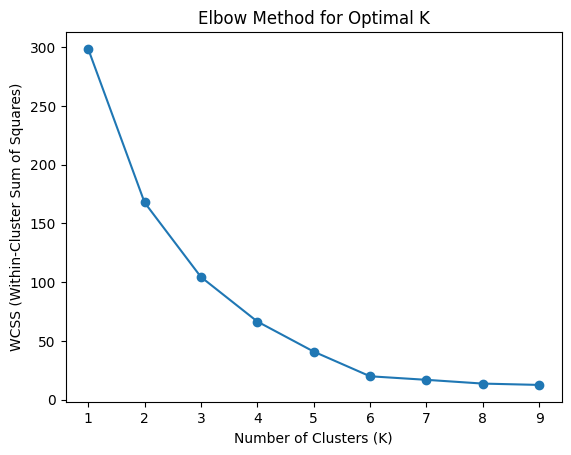

In [28]:
# 다양한 K 값에 대한 Inertia 계산
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(x_pca)
    wcss.append(kmeans_temp.inertia_)
    
# 엘보우 그래프 그리기
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

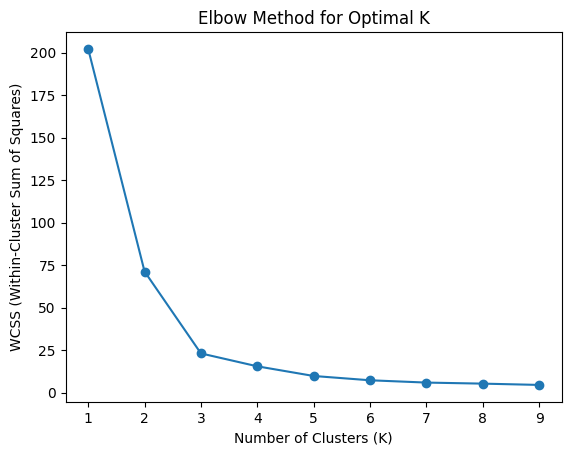

In [33]:
# 다양한 K 값에 대한 Inertia 계산
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans_temp.inertia_)
    
# 엘보우 그래프 그리기
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']])


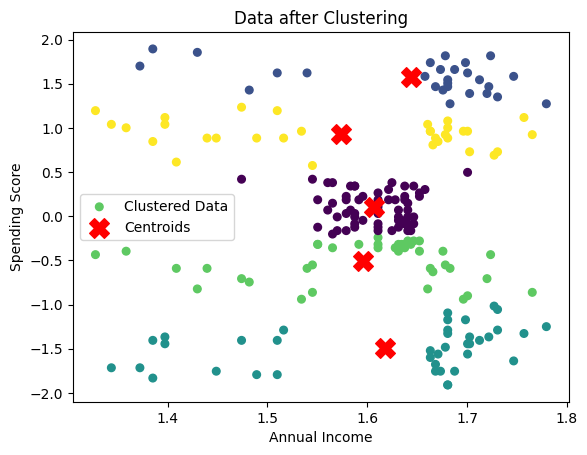

In [38]:
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(data.loc[:, 'Annual Income (k$)'], data.loc[:, 'Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=30,
label="Clustered Data")
# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()